# libray import

# mean midian use karke ham fill the missing value

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import sklearn library

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [9]:
df = pd.read_csv("titanic_toy.csv")
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [10]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [12]:
df.describe()

,Age,Fare,Family,Survived
count,714.000000,846.000000,891.000000,891.000000
mean,29.699118,32.279338,0.904602,0.383838
std,14.526497,50.305796,1.613459,0.486592
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.206250,1.000000,1.000000
max,80.000000,512.329200,10.000000,1.000000


In [13]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [14]:
df.shape

(891, 4)

In [22]:
df.sample(5)

,Age,Fare,Family,Survived
131,20.0,7.0500,0,0
41,27.0,21.0000,1,0
217,42.0,27.0000,1,0
538,NaN,14.5000,0,0
138,16.0,9.2167,0,0


# train_test_split

In [19]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [21]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [30]:
x_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

# calculate mean and midian (Age | Fare)

In [31]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

In [32]:
mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

# create new column & impute missing value

In [33]:
x_train['age_median'] = x_train['Age'].fillna(median_age)
x_train['age_mean'] = x_train['Age'].fillna(mean_age)
x_train['Fare_median'] = x_train['Fare'].fillna(median_fare)
x_train['Fare_mean'] = x_train['Fare'].fillna(mean_fare)


In [34]:
x_train.sample(8)

,Age,Fare,Family,age_median,age_mean,Fare_median,Fare_mean
746,16.0,20.2500,2,16.00,16.000000,20.2500,20.2500
96,71.0,34.6542,0,71.00,71.000000,34.6542,34.6542
690,31.0,57.0000,1,31.00,31.000000,57.0000,57.0000
129,45.0,6.9750,0,45.00,45.000000,6.9750,6.9750
665,32.0,73.5000,2,32.00,32.000000,73.5000,73.5000
389,17.0,12.0000,0,17.00,17.000000,12.0000,12.0000
180,NaN,69.5500,10,28.75,29.785904,69.5500,69.5500
787,8.0,29.1250,5,8.00,8.000000,29.1250,29.1250


# Review Variance

In [38]:
print('Original Age variable variance:', x_train['Age'].var())
print('Age Variance after median imputation:', x_train['age_median'].var())
print('Age Variance after mean imputation:', x_train['age_mean'].var())

print('Original Fare variable variance:', x_train['Fare'].var())
print('Fare Variance after median imputation:', x_train['Fare_median'].var())
print('Fare Variance after mean imputation:', x_train['Fare_mean'].var())


Original Age variable variance: 204.3495133904614
Age Variance after median imputation: 161.9895663346054
Age Variance after mean imputation: 161.81262452718673
Original Fare variable variance: 2448.197913706318
Fare Variance after median imputation: 2340.0910219753637
Fare Variance after mean imputation: 2324.2385256705547


# changes in distributation in age

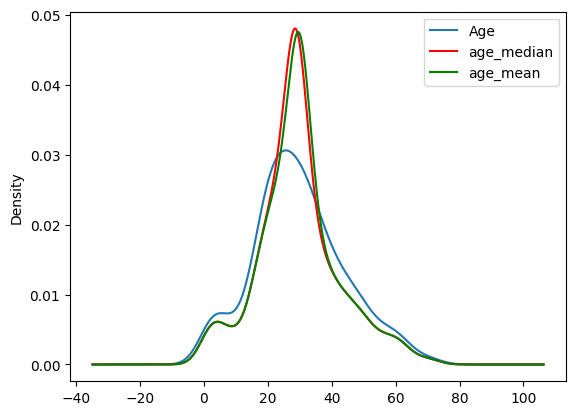

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['age_mean'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


# changes in distributation in Fare

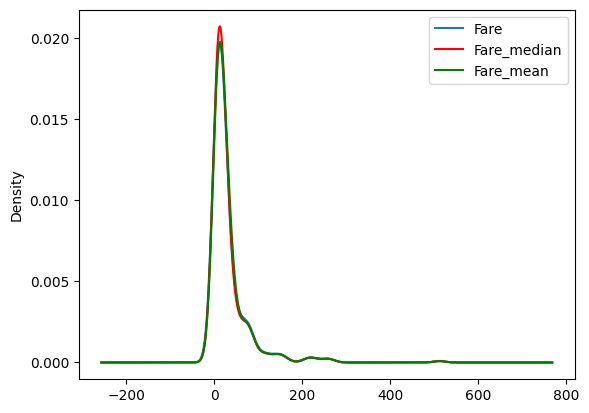

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


# check covarraiance

In [42]:
x_train.cov()

,Age,Fare,Family,age_median,age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


# check correlation

In [43]:
x_train.corr()

,Age,Fare,Family,age_median,age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


# box plot for age

<Axes: >

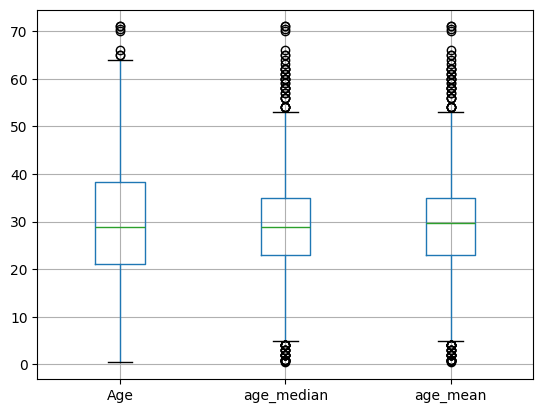

In [44]:
x_train[['Age','age_median','age_mean']].boxplot()

# box plot for Fare

<Axes: >

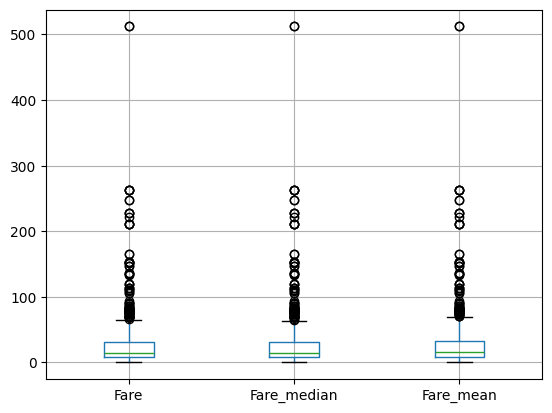

In [45]:
x_train[['Fare','Fare_median','Fare_mean']].boxplot()